<div style="border:solid Chocolate 2px; padding: 40px">

<b>Михаил, привет!👋</b>

Меня зовут Евгений Хоран, я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, **не удаляй мои комментарии**, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими, выделяя их цветами и наиболее понравившимся тебе способом оформления, но явно  отличающимся от моих комментариев. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Сборный проект 1 - Продажи компьютерных игр

## Введение

**Описание проекта**

Доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Описание данных**

1. `Name` — название игры
2. `Platform` — платформа
3. `Year_of_Release` — год выпуска
4. `Genre` — жанр игры
5. `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
6. `EU_sales` — продажи в Европе (миллионы проданных копий)
7. `JP_sales` — продажи в Японии (миллионы проданных копий)
8. `Other_sales` — продажи в других странах (миллионы проданных копий)
9. `Critic_Score` — оценка критиков (максимум 100)
10. `User_Score` — оценка пользователей (максимум 10)
11. `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Предобработка данных

Для начала проверим какие данные нам достались. Нас интересуют:

1. Названия колонок и NaNs.
2. Артефакты в данных и строки-дубликаты.
3. Пропущенные значения.
4. Дополнительные параметры и типы данных.

Пойдем по порядку.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from IPython.display import display
plt.style.use('default')

# Я привык сохранять исходный датасет, чтобы можно было проследить какие преобразования были совершены.
try:
    raw_games = pd.read_csv('games.csv')
except:
    raw_games = pd.read_csv('/datasets/games.csv')

# Проверим, что внутри датасета.
raw_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Надо переименновать заголовки и разобраться с типами данных в колонке `user_score`. Заметим, что есть много пропущенных значений в некоторых категориях - например, `critic_score`.

In [3]:
# Посмотрим на таблицу.
raw_games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Очень красивая таблица.

### Названия колонок и NaNs

Прежде, чем прыгнем в исследования, надо причесать этот датасет: сделать нормальные названия колонок, разобраться со старнными значениями в столбцах.

In [4]:
# Нормальный регистр для колонок.
df_games = raw_games
df_games.columns = df_games.columns.str.lower()

# Функция для определения колонок с null или non_numeric_values.
def fun_get_columns_with_non_numeric_values(df):
    """
    This function looks for non numeric values (e.g.: 'tbd') in columns which should have been numeric.
    It returns what are the non numeric values inside and a list of columns that have them.

    Args:
        df (DataFrame): A dataframe to check.
        
    Returns:
        columns_with_nan (list): List of columns with non numeric values.
    """
    columns_with_nan = []
    
    for column in df.columns:
        rows_with_null = df[column].isna()
        rows_with_nan = pd.to_numeric(df[column], errors='coerce').isna()
        
        if (rows_with_nan.sum() > 0) & (rows_with_nan.sum() != rows_with_null.sum()):
            columns_with_nan.append(column)
            print('-' * 50)
            print(df[column][rows_with_nan].value_counts())
            
    print('-' * 50)
    print('Columns with non numeric values:')
    print(columns_with_nan)
    print('-' * 50)
    return columns_with_nan

# Посмотрим, что получилось.
fun_get_columns_with_non_numeric_values(df_games[['na_sales',
                                                   'eu_sales',
                                                   'jp_sales',
                                                   'other_sales',
                                                   'critic_score',
                                                   'user_score',
                                                   'year_of_release']]);

--------------------------------------------------
tbd    2424
Name: user_score, dtype: int64
--------------------------------------------------
Columns with non numeric values:
['user_score']
--------------------------------------------------


`tbd` - это зашифрованное `to be determined`. Видимо, `user_score` для некоторых игр еще не был посчитан по каким-то причинам. Надо исправить, иначе не сможем задать правильный тип данных.

In [5]:
# Заменими tbd значения на np.nan - они будут исправлены дальше.
df_games.user_score.replace('tbd', np.nan, inplace=True)
df_games = df_games.astype({'user_score': 'float64'})

# Посмотрим, что получилось
fun_get_columns_with_non_numeric_values(df_games[['na_sales',
                                                   'eu_sales',
                                                   'jp_sales',
                                                   'other_sales',
                                                   'critic_score',
                                                   'user_score',
                                                   'year_of_release']]);

--------------------------------------------------
Columns with non numeric values:
[]
--------------------------------------------------


### Артефакты в данных и строки-дубликаты



Следующим шагом посмотрим на артефакты в данных и потенциальные строки-дубликаты.

In [6]:
# Посмотрим на распределения внутри количественных колонок.
display(round(df_games.describe(), 2))

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00,7590.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97,7.13
std,5.88,0.81,0.50,0.31,0.19,13.94,1.50
min,1980.00,0.00,0.00,0.00,0.00,13.00,0.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00,6.40
50%,2007.00,0.08,0.02,0.00,0.01,71.00,7.50
75%,2010.00,0.24,0.11,0.04,0.03,79.00,8.20
max,2016.00,41.36,28.96,10.22,10.57,98.00,9.70


Что видно из статистики.

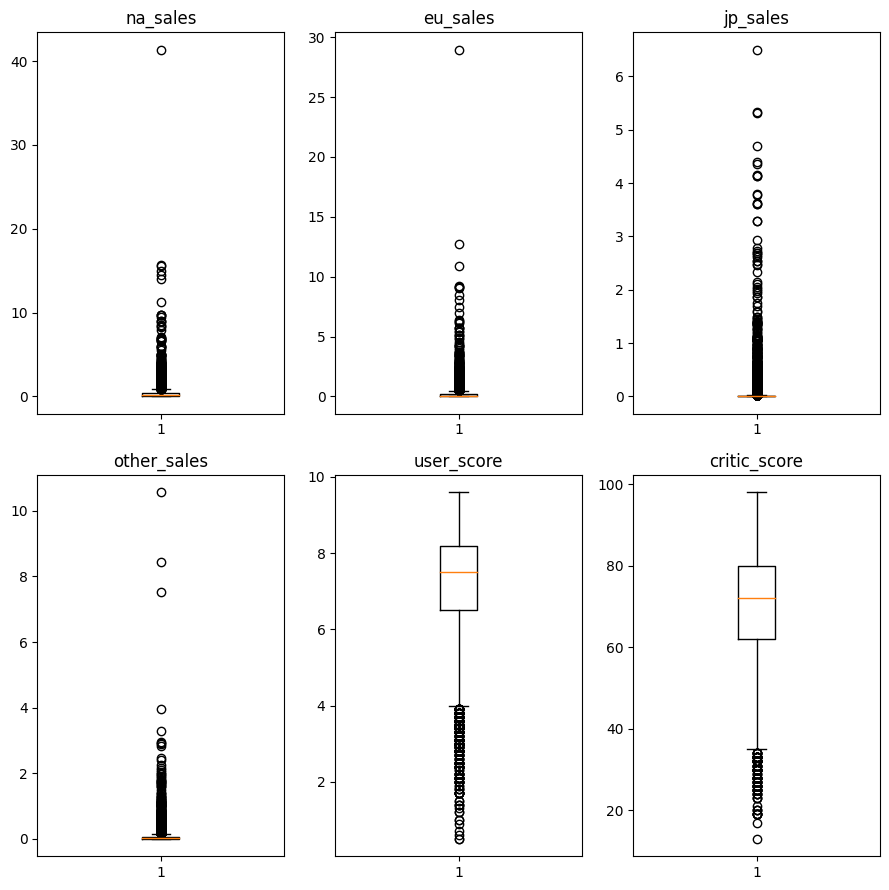

In [7]:
def fun_get_boxplots_for_columns(df, columns, num_rows, num_columns):
    """
    This function creates a num_rows x num_columns box subplots for a list of columns out of the dataset.

    Args:
        df (DataFrame): dataframe with data to show.
        columns (List): list of columns to plot.
        num_rows (int): number of rows in subplots.
        num_columns (int): number of columns in subplots.
    """
    # Для начала коробки с усами.
    fig, axs = plt.subplots(num_rows, num_columns, figsize=(9, 9))

    # Добавим каждый бокс-с-усами к фигуре.
    for i, ax in enumerate(axs.flat):
        ax.boxplot(df[columns].dropna().iloc[:, i])
        ax.set_title(df[columns].columns[i])

    # Сделаем нормальный формат графиков и удалим ненужные переменные.
    plt.tight_layout()

fun_get_boxplots_for_columns(df_games, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales',
                                        'user_score', 'critic_score', 'year_of_release'], 2, 3)

Бросаются в глаза длинные хвосты продаж в разных регионах. Надо будет их обрезать.

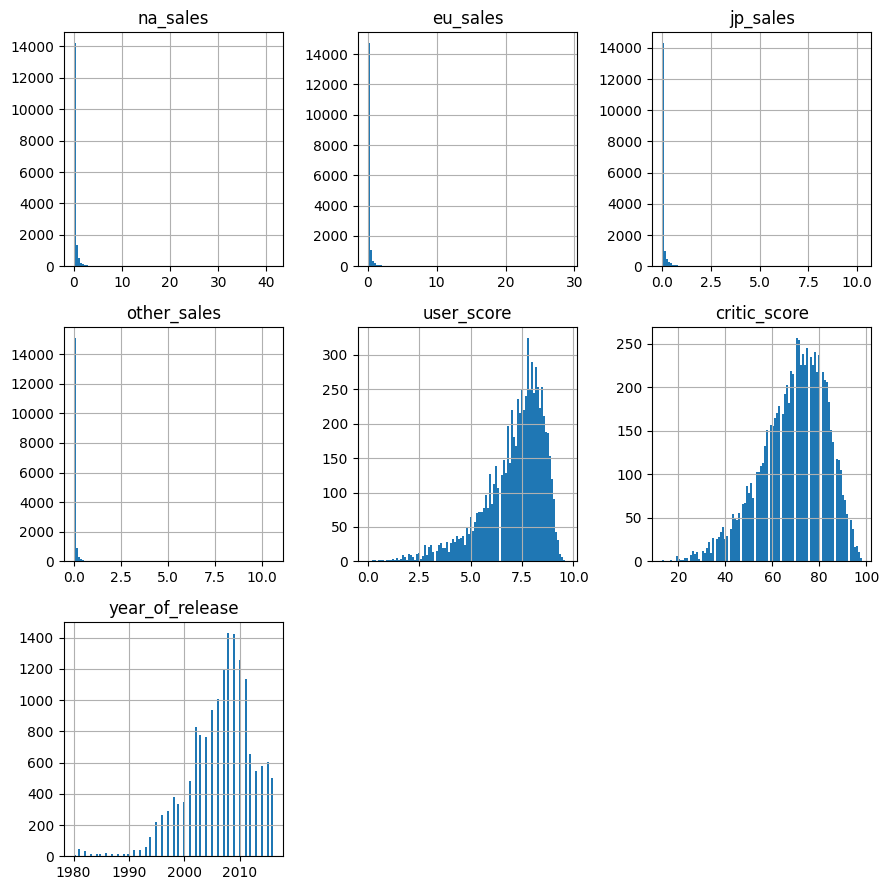

In [8]:
df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales',
          'user_score', 'critic_score', 'year_of_release']].hist(bins=100,
                                                                 figsize=(9, 9));
plt.tight_layout();

`user_score`, `critic_score` и `year_of_release` выглядят крайне правдоподобно: немного скошенные нормальные распределения. А вот продажи по регионам (как мы увидели на прошлом графике) имеют длинные хвосты.

Обрежем наш датасет по году выпуска (не интересны нам игры выпущенные до моего рождения) и по продажам в регионах. В колонке год выпуска надо оставить `null`'s: их не восстановить статистическими методами, но и выбрасывать пока не стоит. Разберемся с ними по ходу дела.

Initial number of rows: 16715
Resulting number of rows: 14821
Percentage of rows deleted: 11.3 %


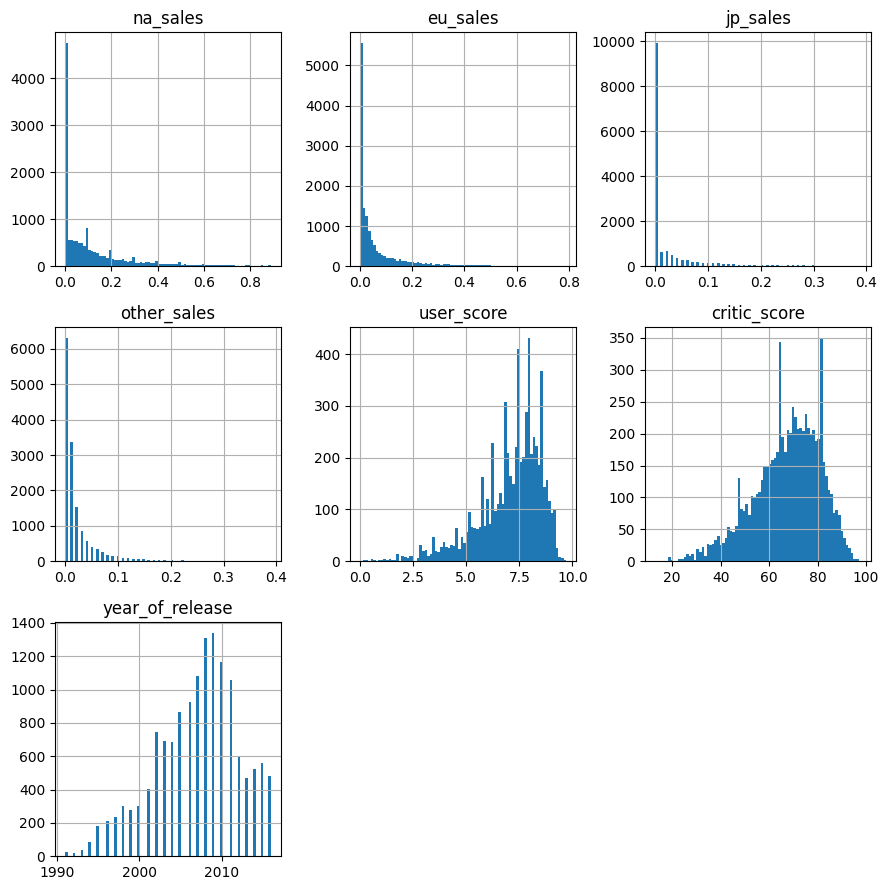

In [9]:
# Обрежем по продажам и по году выпуска.
df_games = df_games[ df_games.na_sales < .9 ]
df_games = df_games[ df_games.eu_sales < .8 ]
df_games = df_games[ df_games.jp_sales < .4 ]
df_games = df_games[ df_games.other_sales < .4 ]
df_games = df_games[ (df_games.year_of_release > 1990) | (df_games.year_of_release.isna()) ]

# Посмотрим, сколько строк мы удалили
print( 'Initial number of rows:', len(raw_games.index) )
print( 'Resulting number of rows:', len(df_games.index) )
print( 'Percentage of rows deleted:', round(100 - len(df_games.index) / len(raw_games.index) * 100, 1), '%' )

# И какие графики полчились
df_games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales',
          'user_score', 'critic_score', 'year_of_release']].hist(bins=80,
                                                                 figsize=(9, 9));
plt.tight_layout();

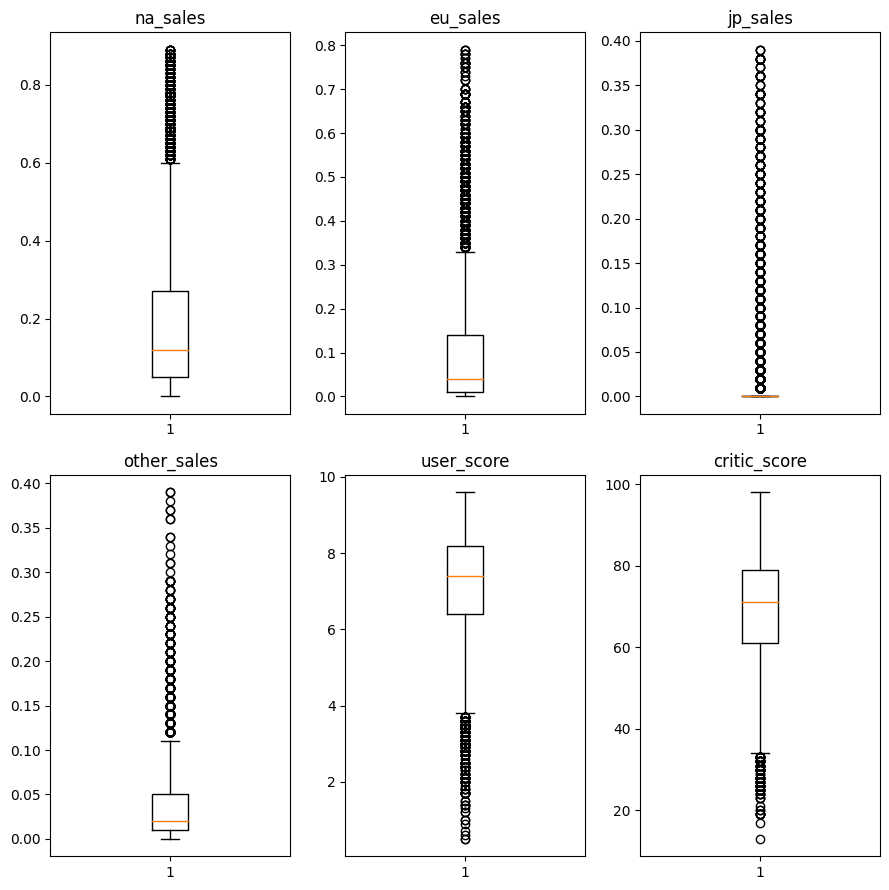

In [10]:
fun_get_boxplots_for_columns(df_games, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales',
                                        'user_score', 'critic_score', 'year_of_release'], 2, 3)

Так намного лушче. Посмотрим на дубликаты.

In [11]:
# Полные дубликаты.
print( 'Количество строк-дубликатов:', df_games.duplicated().sum() )

Количество строк-дубликатов: 0


Похоже, полных дубликатов нет! Ну и хорошо.

### Пропущенные значения

Найдем и, если можно, восстановим.

In [12]:
# Найдем колонки с пропущенными значениями через функцию - нам надо будет сделать это пару раз.
def fun_get_columns_with_nan(df):
    """
    This function returns a list of column names, which have null or NaN values.

    Args:
        df (DataFrame): A dataframe to check.

    Returns:
        columns_with_nan (list): A list of column names which have nulls or NaNs inside.
    """
    columns_with_null = []

    for column in df.columns:
        if df[column].isna().sum() > 0:
            columns_with_null.append(column)
    return columns_with_null

# Посмотрим на них.
print('Колонки с пропущенными значениями:')
print(fun_get_columns_with_nan(df_games))
print('Количество пропущенных значений:')
print( df_games[ fun_get_columns_with_nan(df_games) ].isna().sum() )

Колонки с пропущенными значениями:
['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
Количество пропущенных значений:
name                  1
year_of_release     250
genre                 1
critic_score       7659
user_score         8229
rating             5899
dtype: int64


Из всех колонок мы можем восстановить только `critic_score` и `user_score`. Для них восстановление по средним или медианным должно быть уместным: эти распределения немного ассиметричные, но похожи на нормальные распределения. Остальные придется оставить как неизвестные `unknown`, потому что не можем ничего про них сказать.

В колонке год выпуска значения заполним нулями. Мы не можем здесь использовать средние или медианные значения, потому что это исказит смысл. Так будет понятно, что это замещение пустых значений, но также даст нам задать тип данных `int`.

Неизвестные в `name` и `genre` - скорей всего, просто незаполненные значения. Таких всего 2 во всем датасете. Неизвестных в `year_of_release` несколько сотен - возможно, это связано либо с автоматическими алгоритмами (не запарсили по имени), либо как-то связано с годом выпуска игр. На первый взгляд, они все довольно старые (раньше 2011 года). Колонки с различными оценками пустые, потому что, скорей всего на момент записи рейтингов еще не было.

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Вот тут я не стал обрезать года, потому что тогда начинаем убивать строки с существенными продажами. Дальше в анализе эти строки все равно исчезают, потому что просят посмотреть на релевантный период, но тем не менее.

</div>

In [13]:
# Fill in NaNs in category columns with unknowns. For `year_or_release` we will just set zeros.
df_games[['name', 'genre', 'rating']] = df_games[['name', 'genre', 'rating']].fillna('unknown')
df_games.year_of_release.fillna(0, inplace=True)

# Восстановим по медианным значениям.
# Лучше бы восстановить по производителям, но такой информации нет.
df_games.critic_score.fillna(-1, inplace=True)
df_games.user_score.fillna(-1, inplace=True)

# Посмотрим что получилось.
fun_get_columns_with_nan(df_games)

[]

### Дополнительные значения и типы данных

Добавим суммарные продажи по всем регионам. После этого, можем задать типы данных в каждых колонках.

In [14]:
# Добавим суммарные продажи.
df_games['total_sales'] = raw_games.na_sales + raw_games.eu_sales + raw_games.jp_sales + raw_games.other_sales

# Зададим типы данных.
df_games = df_games.astype({'name': 'object',
                            'platform': 'object',
                            'year_of_release': 'int64',
                            'genre': 'object',
                            'na_sales': 'float64',
                            'eu_sales': 'float64',
                            'jp_sales': 'float64',
                            'other_sales': 'float64',
                            'critic_score': 'int64',
                            'user_score': 'float64',
                            'rating': 'object',
                            'total_sales': 'float64'})

# Посмотрим, что получилось.
display(df_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
895,Destiny: The Taken King,PS4,2015,Shooter,0.78,0.79,0.04,0.31,86,6.0,T,1.92
907,Diablo III,PS3,2013,Role-Playing,0.72,0.75,0.15,0.29,86,6.4,M,1.91
920,Medal of Honor: European Assault (All Region s...,PS2,2005,Shooter,0.89,0.69,0.09,0.21,-1,-1.0,unknown,1.88
945,LEGO Marvel Super Heroes,PS3,2013,Action,0.77,0.76,0.01,0.29,82,7.9,E10+,1.83
954,GoldenEye 007 (2010),Wii,2010,Action,0.84,0.70,0.13,0.16,-1,-1.0,unknown,1.83


<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Не знаю, как я ошибся с номере главы, должна была быть 3.1
    
Из всех колонок мы можем восстановить только `critic_score` и `user_score`, но пропусков слишком много, чтобы восстановление оказалось адекватным. Придется оставить как неизвестные `unknown` или `-1`, потому что не можем ничего про них сказать.

В колонке год выпуска значения заполним нулями. Мы не можем здесь использовать средние или медианные значения, потому что это исказит смысл. Так будет понятно, что это замещение пустых значений, но также даст нам задать тип данных `int`.
    
Неизвестные в `name` и `genre` - скорей всего, просто незаполненные значения. Таких всего 2 во всем датасете. Неизвестных в `year_of_release` несколько сотен - возможно, это связано либо с автоматическими алгоритмами (не запарсили по имени), либо как-то связано с годом выпуска игр. На первый взгляд, они все довольно старые (раньше 2011 года). Колонки с различными оценками пустые, потому что, скорей всего на момент записи рейтингов еще не было.


</div>

## Исследовательский анализ данных

Посмотрим, какие глобальные закономерности мы можем найти в данных. Поисследуем как продажи игр распределны по годам и по платформам.

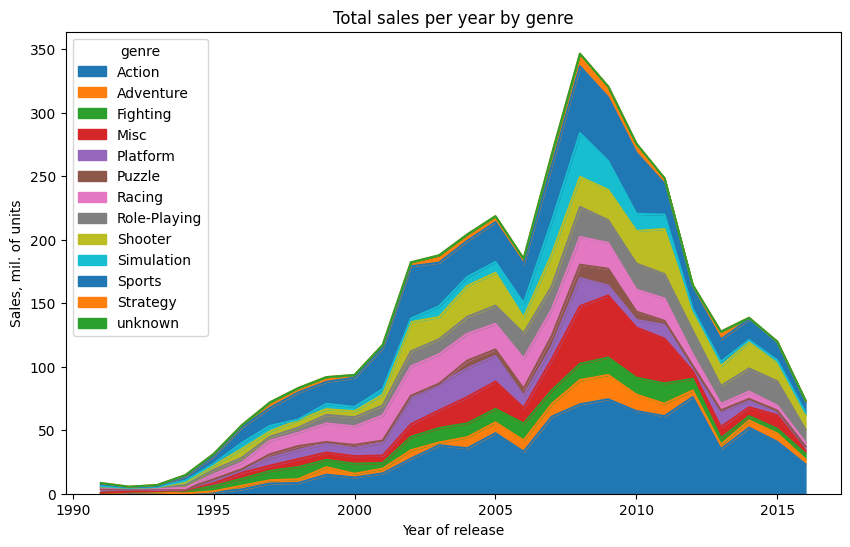

In [15]:
# Total sales per year.
pd.pivot_table(df_games[df_games.year_of_release != 0],
               values='total_sales',
               index='year_of_release',
               columns='genre',
               aggfunc='sum')\
  .plot(kind='area',
        title='Total sales per year by genre',
        xlabel='Year of release',
        ylabel='Sales, mil. of units',
        figsize=(10, 6));

Очень красивый график. Сразу видно, что есть некоторые жанры, которые пользуются большей популярностью, чем другие - `action`, `misc`, `sports`. Жанр `strategy` оказался одним из самых маленьких. Где-то грустит Керриган.

Видно, что продажи сильно менялись за последние 25 лет. Бурный рост с 1990 по 2010 сменился стремительным спадом. Инетересно, что же такого произошло между 2005 и 2010 годом, что привело к такому обвалу рынка. С тех пор он так и не восстановился и продолжил достаточно стремительное падение. Если мы хотим предсказать дальнешую динамику - явно, мы можем использовать только последние несколько лет для анализа.

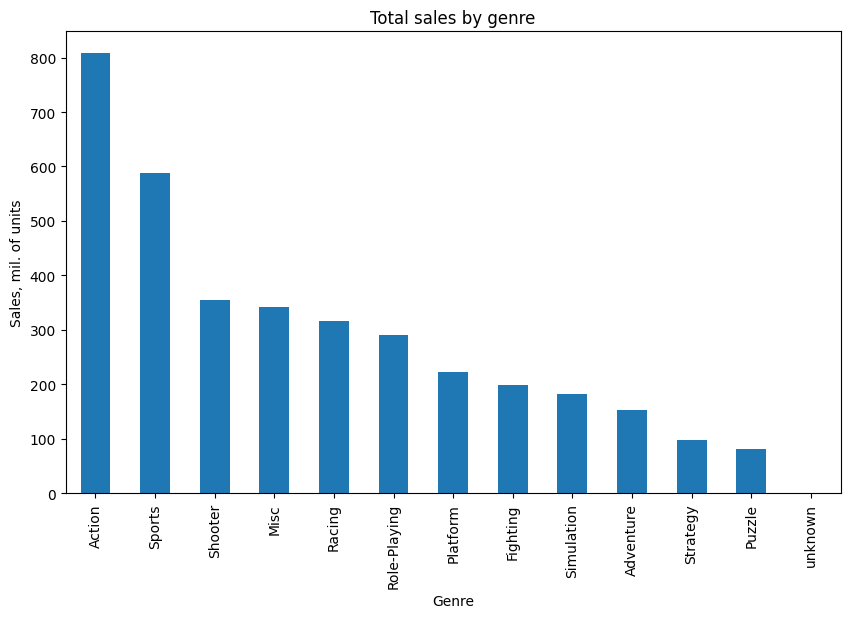

In [16]:
# Total sales per year.
pd.pivot_table(df_games[df_games.year_of_release != 0],
               values='total_sales',
               index='genre',
               aggfunc='sum')\
  .sort_values(by='total_sales',
               ascending=False)\
  .plot(kind='bar',
        y='total_sales',
        title='Total sales by genre',
        xlabel='Genre',
        ylabel='Sales, mil. of units',
        legend=False,
        figsize=(10, 6));

Как и ожидалось, продажи не распределены равномерно по жанрам. Более "попсовые" жанры имеют высокие продажи (`Call of Duty` самая продаваемся игра всех времен и народов после `Mario`?).

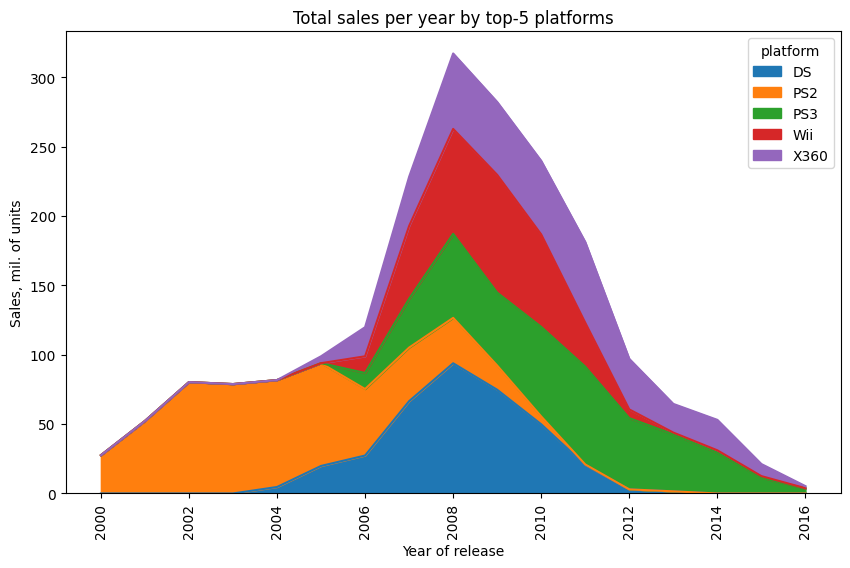

In [17]:
# Top-5 platforms by total sales.
lut_top5_platforms = pd.pivot_table(df_games[df_games.year_of_release != 0],
                                    values='total_sales',
                                    index='platform',
                                    aggfunc='sum')\
                       .sort_values(by='total_sales',
                                    ascending=False)\
                       .head(5)\
                       .index\
                       .values
                       
# Total sales per year for top-5 platforms.
pd.pivot_table(df_games[(df_games.year_of_release != 0) &
                        (df_games.platform.isin(lut_top5_platforms))],
               values='total_sales',
               index='year_of_release',
               columns='platform',
               aggfunc='sum')\
   .plot(kind='area',
#     ,     xticks=df_games[df_games.year_of_release != 0].year_of_release.unique(),
         rot=90,
         title='Total sales per year by top-5 platforms',
         xlabel='Year of release',
         ylabel='Sales, mil. of units',
         figsize=(10, 6));

Похоже, что-то произошло в 2011-2013 годах: количество проданных копий снизилось в несколько почти по всем категориям! Для дальнейших приключений возмем данные начиная с 2013 года, думаю, они будут наиболее реперезентативными.

Из этого графика также можно прикинуть средний срок жизни платформы - он составляет около 8-10 лет: `DS` с 2003 по 2012 и `PS3` с 2006 по 2016.

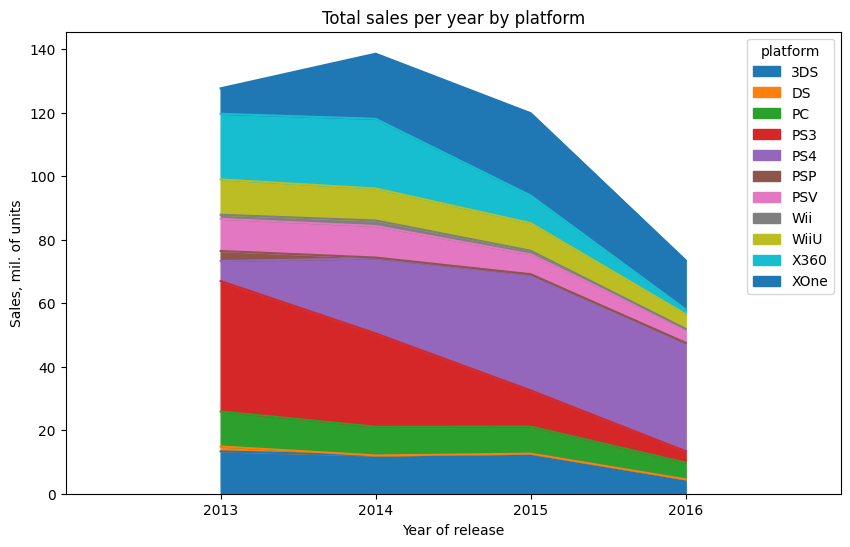

In [18]:
# Cut data we don't need anymore.
df_games = df_games[ df_games.year_of_release >= 2013 ]

# Let's check how sales are distributed per platform.
pd.pivot_table(df_games,
               values='total_sales',
               index='year_of_release',
               columns='platform',
               aggfunc='sum')\
   .plot(kind='area',
         xticks=df_games.year_of_release.unique(),
         legend=True,
         title='Total sales per year by platform',
         xlabel='Year of release',
         xlim=(2012, 2017),
         ylabel='Sales, mil. of units',
         figsize=(10, 6));

Продажи по платформам также неравномерные. Удивительно, что продажи для ПК не в первой тройке. Продажи по различным моделями PlayStation разняться, но это ожидаемо: люди переходят со старой версии железа на новую. Оцифруем, как эти платформы выросли или упали за выбранный период.

In [19]:
# Check which platforms were growing.
pd.pivot_table(df_games[(df_games.year_of_release == 2013) |
                        (df_games.year_of_release == 2016)],
               values='total_sales',
               index='platform',
               columns='year_of_release',
               aggfunc='sum')\
  .sort_values(by=2016,
               ascending=False)

year_of_release,2013,2016
platform,,
PS4,6.31,34.09
XOne,8.01,15.43
PC,11.02,5.25
WiiU,11.14,4.60
3DS,13.33,4.55
PSV,10.14,4.25
PS3,41.09,3.60
X360,20.66,1.52
Wii,1.26,0.18


`PS4`, `XOne`, `PSV`, и `PC` являются одними из самых популярных платформ, с точки зрения продаж. Надо помнить, что платформы имеют некоторые период полураспада, поэтому высокие продажи сейчас не гарантируют высокие продажи потом. Все платформы, кроме `PS4` и `XOne` показали падение продаж за этот период. Но продажи на `PS4` выросли почти в 6 раз, а `XOne` - в два!

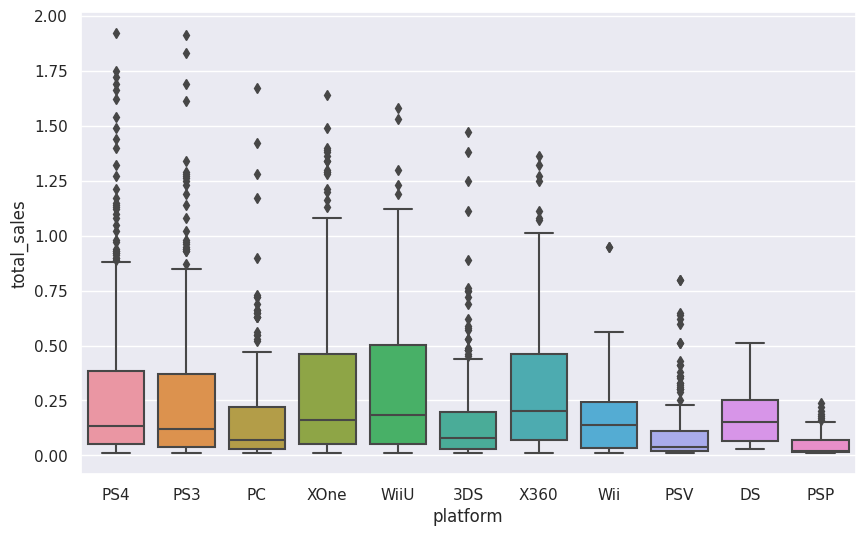

In [20]:
# Total sales per platform
sns.set(rc = {'figure.figsize': (10, 6)})
sns.boxplot(data=df_games,
            x='platform',
            y='total_sales');

Похоже, продажи по платформам имеют сильо разные рспределения. Интересно, что на `PS3` у нас может быть много выбросов в сравнении с `Wii`, например. Сложно сказать, что является причиной такой картинки.

Посмотрим, как влияют отзывы покупателей и критиков на продажи для одной из платформ. Возьмем `PS4` из предыдущего упражнения, потому что эта платформа самая большая в 2016 году.

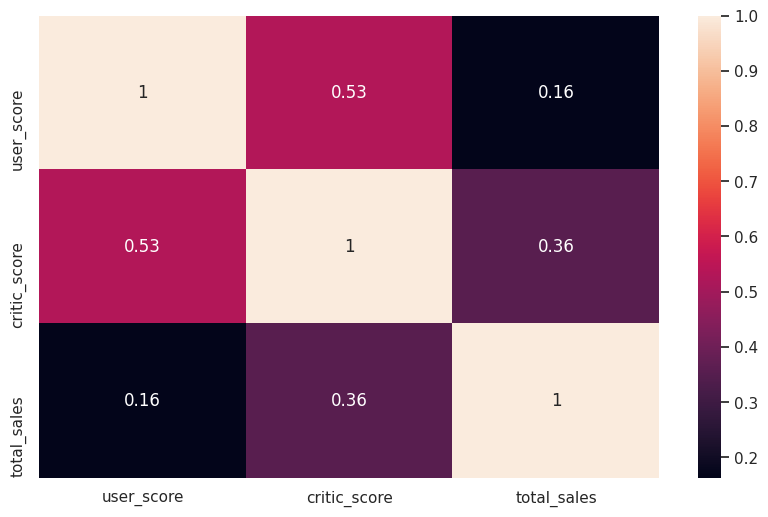

In [21]:
# Show me linear correlations.
sns.heatmap(pd.pivot_table(df_games[(df_games.user_score != -1) & (df_games.critic_score != -1)],
                values='total_sales',
                index=['user_score', 'critic_score'],
                aggfunc='sum')\
              .reset_index()\
              .corr(),
            annot=True);

Похоже, что зависимость есть, но слабая: коэффициент корреляции `user_score` и `critic_score` по отношению к `total_sales` сильно меньше `0.8`.

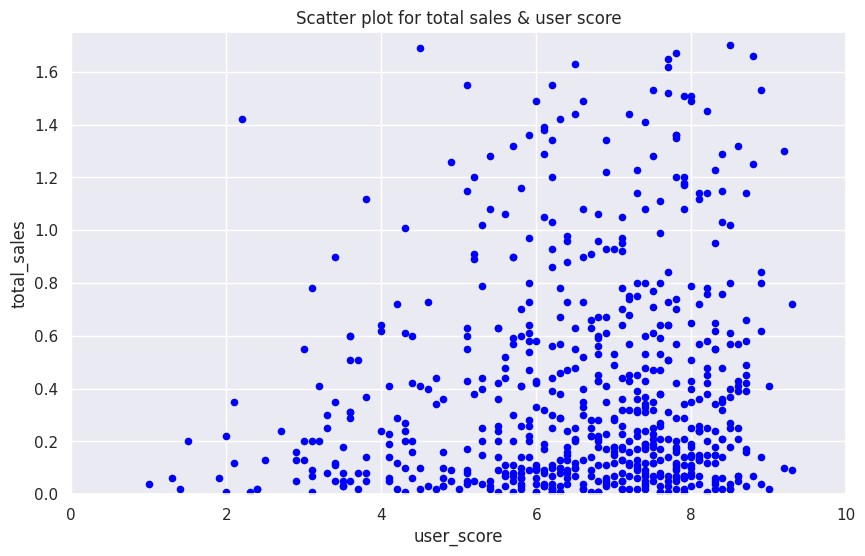

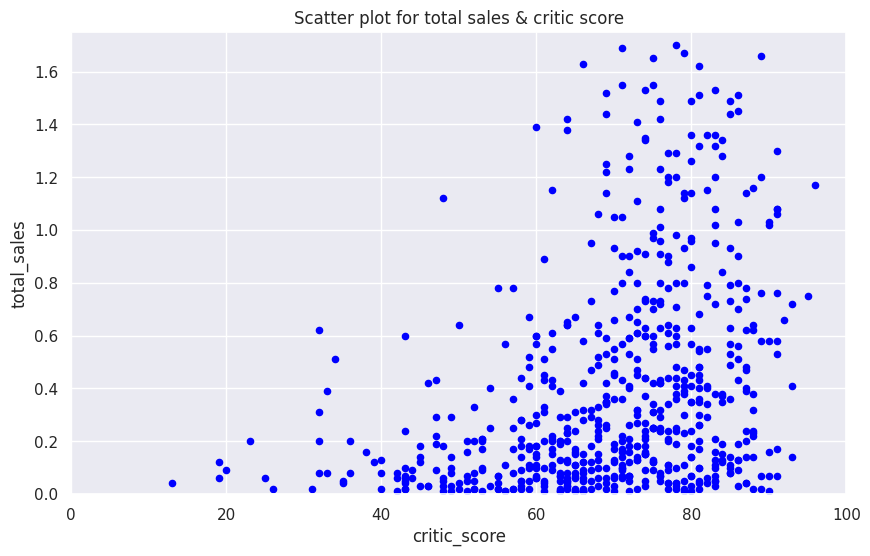

In [22]:
# Show me scatter plot for user_score.
pd.pivot_table(df_games[(df_games.user_score != -1) & (df_games.critic_score != -1)],
               values='total_sales',
               index=['user_score', 'critic_score'],
               aggfunc='sum')\
  .reset_index()\
  .plot(kind='scatter',
        x='user_score',
        y='total_sales',
        c=['blue'],
        xlim=(0, 10),
        ylim=(0, 1.75),
        title='Scatter plot for total sales & user score')
  
# Show me scatter plot for user_score.
pd.pivot_table(df_games[(df_games.user_score != -1) & (df_games.critic_score != -1)],
               values='total_sales',
               index=['user_score', 'critic_score'],
               aggfunc='sum')\
  .reset_index()\
  .plot(kind='scatter',
        x='critic_score',
        y='total_sales',
        c=['blue'],
        xlim=(0, 100),
        ylim=(0, 1.75),
        title='Scatter plot for total sales & critic score');

Выводы: похоже, что действительно нет выраженной зависимости: точки размазаны по всей картинке.

Посмотрим теперь что происходит с жанрами.

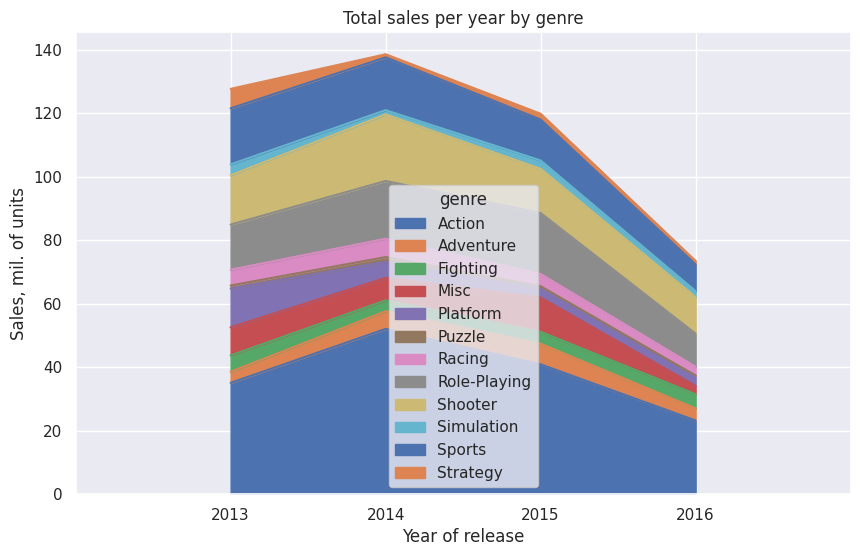

In [23]:
# Let's check how sales are distributed per platform.
pd.pivot_table(df_games,
               values='total_sales',
               index='year_of_release',
               columns='genre',
               aggfunc='sum')\
   .plot(kind='area',
         xticks=df_games.year_of_release.unique(),
         legend=True,
         title='Total sales per year by genre',
         xlabel='Year of release',
         xlim=(2012, 2017),
         ylabel='Sales, mil. of units',
         figsize=(10, 6));

Как мы увидели на прошлом графике, продажи по жанрам распределены неравномерно. Самые популярные жанры: `Action`, `RPG` и `Shooter`.  

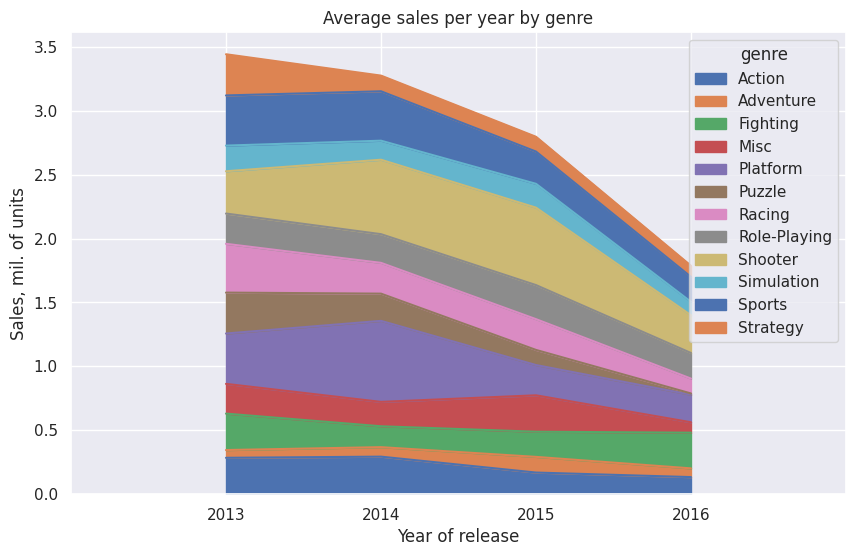

In [24]:
# Let's check how average sales are distributed per platform.
pd.pivot_table(df_games,
               values='total_sales',
               index='year_of_release',
               columns='genre',
               aggfunc='mean')\
   .plot(kind='area',
         xticks=df_games.year_of_release.unique(),
         legend=True,
         title='Average sales per year by genre',
         xlabel='Year of release',
         xlim=(2012, 2017),
         ylabel='Sales, mil. of units',
         figsize=(10, 6));

Но если посмотрим на средние продажи по годам, то картинка немного поменяется. Так, `platform` и `fighting` в среднем продаются лучше, чем остальные. Если мы ищем жанр, где с большей вероятностью получим успешный продукт - стоит обратить внимание именно на эти жанры.

## Портрет пользователя в различных регионах

Посмотрим, какие популярные платформы и жанры есть в разных регионах. А также как рейтинг ESRB влияет на продажи.

<Figure size 1000x600 with 0 Axes>

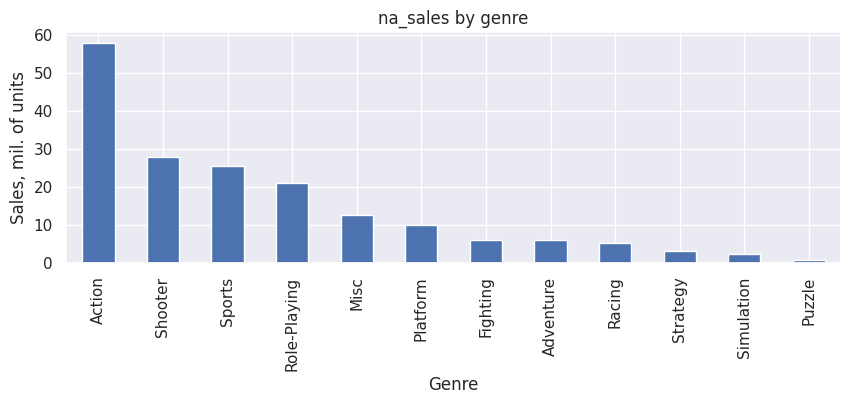

<Figure size 1000x600 with 0 Axes>

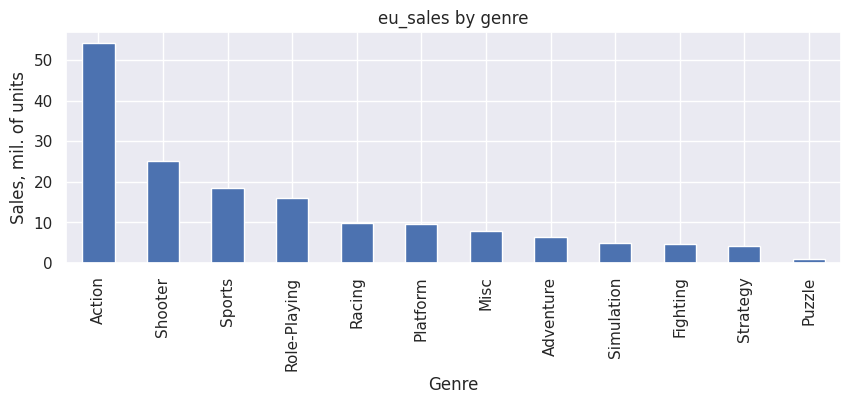

<Figure size 1000x600 with 0 Axes>

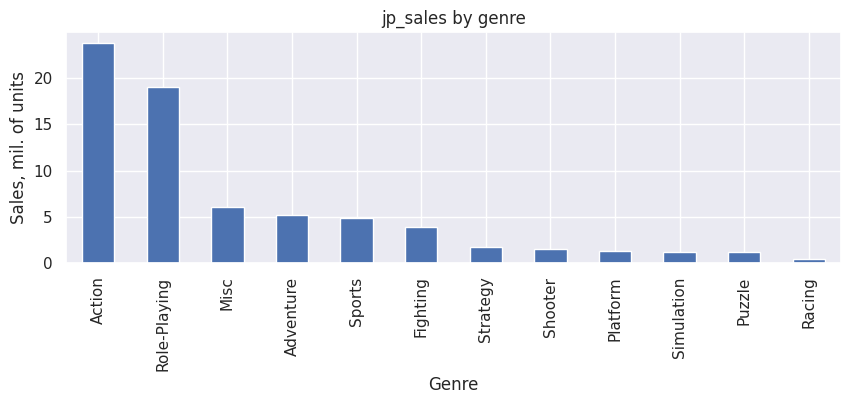

In [25]:
# Top-5 genres per region.
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']:
    plt.figure();
    pd.pivot_table(df_games,
                values=region_sales,
                index='genre',
                aggfunc='sum')\
    .sort_values(by=region_sales,
                ascending=False)\
    .plot(kind='bar',
          y=region_sales,
          title=region_sales + ' by genre',
          xlabel='Genre',
          ylabel='Sales, mil. of units',
          legend=False,
          figsize=(10, 3));

Из графиков видно, что пользователи разных регионов предпочитают разные жанры (хотя жанр `Action` остается на первом в каждой выборке). Суммарные продажи также разнятся: я думаю, будет справедливо сказать, что Северная Америка толкает рынок видеоигр в целом.

Интересно, если проигнорировать жанр `Action`, то продажи в Европе и Северной Америке достаточно равномерно распределны по остальным жанрам. А вот в Японии не так: здесь есть еще один явный лидер `RPG`, который близко стоит рядом с `Action`.

Скорей всего, причины различий в мобильных платформах и культуре игроков: чтобы играть в шутеры, надо иметь нормальную консоль или ПК. А вот чтобы играть в различные РПГ - достаточно телефона. Анимешные персонажи, хороший сюжет и пошаговые бои с блестящей графикой - это один из популярных вариантов игр.

<Figure size 1000x600 with 0 Axes>

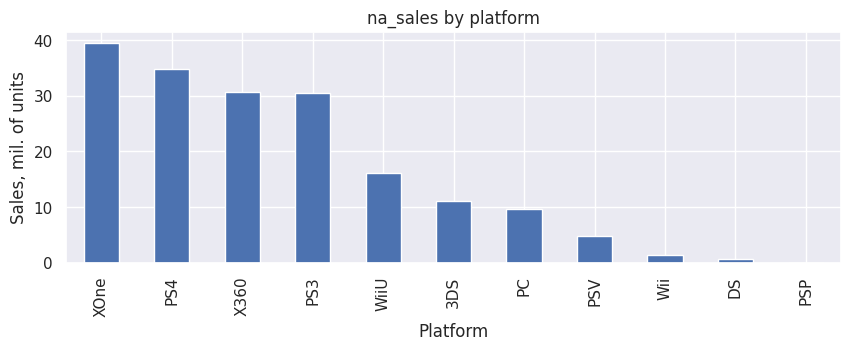

<Figure size 1000x600 with 0 Axes>

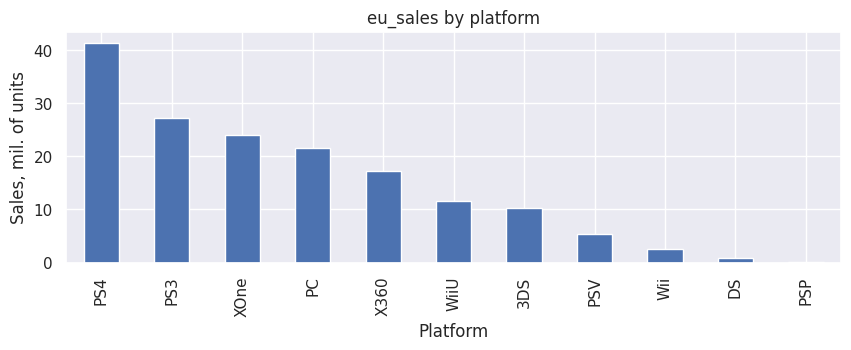

<Figure size 1000x600 with 0 Axes>

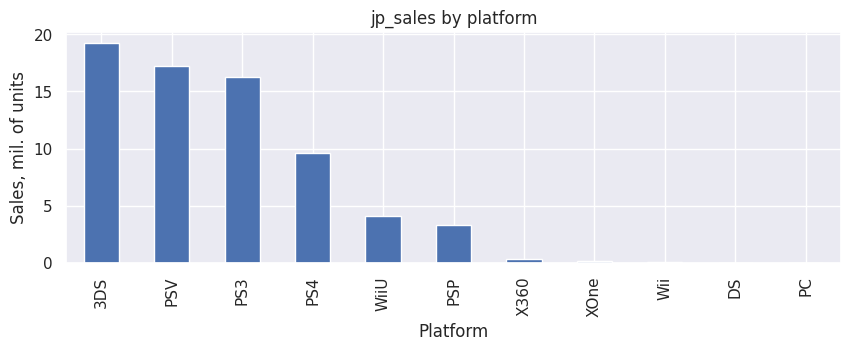

In [26]:
# Top-5 platforms per region.
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']:
    plt.figure();
    pd.pivot_table(df_games,
                values=region_sales,
                index='platform',
                aggfunc='sum')\
    .sort_values(by=region_sales,
                ascending=False)\
    .plot(kind='bar',
          y=region_sales,
          title=region_sales + ' by platform',
          xlabel='Platform',
          ylabel='Sales, mil. of units',
          legend=False,
          figsize=(10, 3));

Очень похожую картинку мы видим в продажах по платформам, но в этом случае лидеры продаж разные. В Северной Америке лидируют консоли Микрософт и Сони. В Еропе Сони также популярна, но ПК игры занимают второе место. А вот в Японии все совсем по-другому: продажи на X-Box и ПК почти не существуют! Зато большой популярностью пользуются мобильные устройства.

<Figure size 1000x600 with 0 Axes>

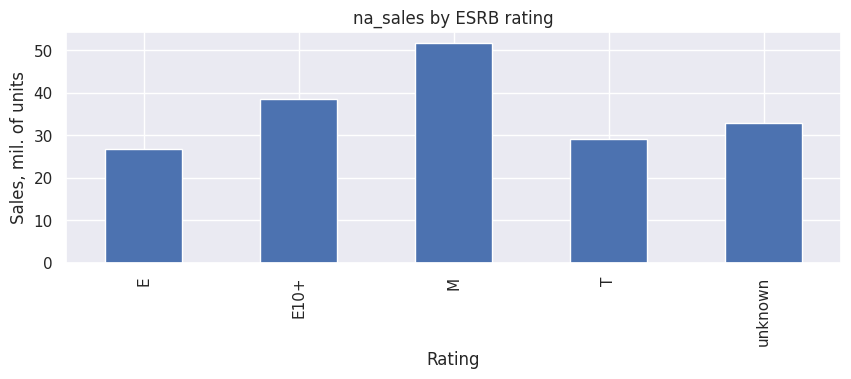

<Figure size 1000x600 with 0 Axes>

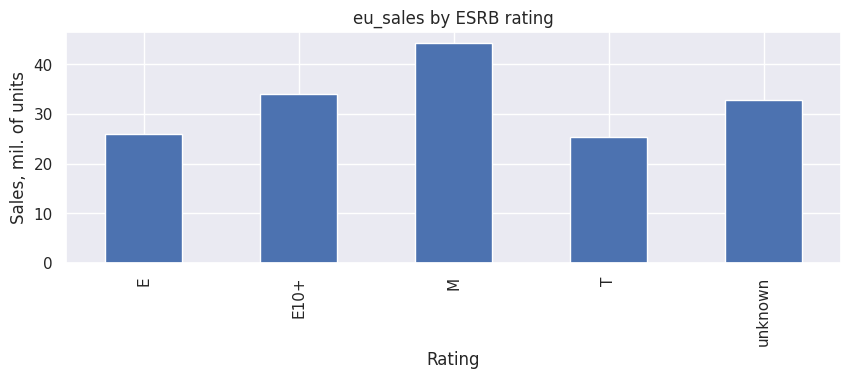

<Figure size 1000x600 with 0 Axes>

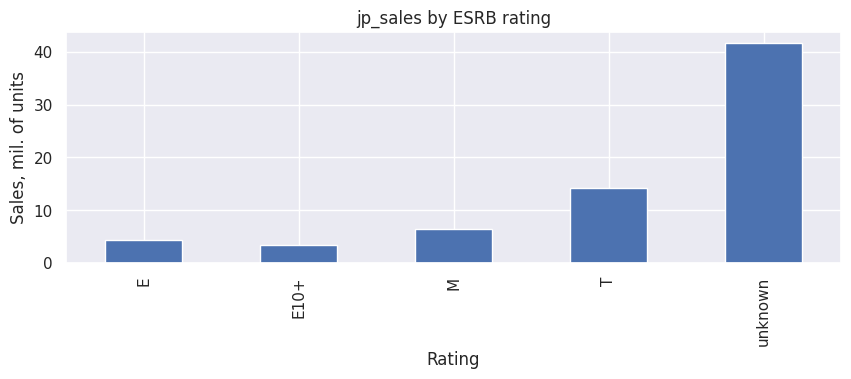

In [27]:
# ESRB rating influence on sales.
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']:
    plt.figure();
    pd.pivot_table(df_games,
                values=region_sales,
                index='rating',
                aggfunc='sum')\
    .plot(kind='bar',
          y=region_sales,
          title=region_sales + ' by ESRB rating',
          xlabel='Rating',
          ylabel='Sales, mil. of units',
          legend=False,
          figsize=(10, 3));

Снова Япония сильно отличается от остального мира. Здесь много игр не имеют ESRB рейтинга совсем (вероятно, потому что большая часть продаж приходится на мобильные утройства). Также в Японии видно, что рейтинг `T` значительно более популярен, чем остальные рейтинги. Вероятно, потому что это игры для детей от 13 лет.

Рейтинг ESRB в Европе и Северной Америке, похоже, не сильно влияет на продажи: они распределены достаточно равномерно.

## Проверка гипотез

Перейдем к проверке гипотез. С точки зрения статистики, первая гипотеза может может быть записано как:

> Нулевая гипотеза: средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.

> Альтернативная гипотеза: средние пользовательские рейтинги платформ `Xbox One` и `PC` разные.

Это проверть просто, т.к. среднее можно посчитать напрямую. Но в качестве упражнения, интересно, что покажут статистические методы.

In [28]:
# Вычислим среднее по каждой выборке и выведем на экран
print('Средний пользовательский рейтинг на платформе XOne:', 
      round(df_games[(df_games.platform == 'XOne') & (df_games.user_score != -1)].user_score.mean(), 2))
print('Средний пользовательский рейтинг на платформе PC:', 
      round(df_games[(df_games.platform == 'PC') & (df_games.user_score != -1)].user_score.mean(), 2))

Средний пользовательский рейтинг на платформе XOne: 6.58
Средний пользовательский рейтинг на платформе PC: 6.29


In [29]:
# То же самое но с помощью scipy.
# t-тест
results = st.ttest_ind(
    df_games[(df_games.platform == 'XOne') & (df_games.user_score != -1)].user_score, 
    df_games[(df_games.platform == 'PC') & (df_games.user_score != -1)].user_score)

print('p-значение:', round(results.pvalue, 3))

if results.pvalue < .05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

p-значение: 0.101
Принимаем нулевую гипотезу


Средний рейтинг действительно очень близок на двух платформах. Примаем нулевую гипотезу.

Посмотрим теперь на вторую гипотезу. Ее можно записать:

> Нулевая гипотеза: средние пользовательские рейтинги жанров `Action` и `Sports` одинаковые.

> Альтернативная гипотеза: средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Эту гипотезу тоже можно проверить напрямую: датасет достаточно маленький. Но чтобы удволетворить любопытсво, проверим ее статистическими методами тоже.

In [30]:
# Вычислим среднее по каждой выборке и выведем на экран
print('Средний пользовательский рейтинг в жанре Action:', 
      round(df_games[(df_games.genre == 'Action') & (df_games.user_score != -1)].user_score.mean(), 2))
print('Средний пользовательский рейтинг в жанре Sports:', 
      round(df_games[(df_games.genre == 'Sports') & (df_games.user_score != -1)].user_score.mean(), 2))

Средний пользовательский рейтинг в жанре Action: 6.8
Средний пользовательский рейтинг в жанре Sports: 5.26


In [31]:
# То же самое но с помощью scipy.
# t-тест
results = st.ttest_ind(
    df_games[(df_games.genre == 'Action') & (df_games.user_score != -1)].user_score, 
    df_games[(df_games.genre == 'Sports') & (df_games.user_score != -1)].user_score)

print('p-значение:', round(results.pvalue, 3))

if results.pvalue < .05:
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

p-значение: 0.0
Отвергаем нулевую гипотезу


А в этом случае, средний рейтинг оказался одинаковым. Мне сложно сказать почему бы так могло случится - я думаю, что это просто случайность, потому что вряд ли игры из разных жанров как-то от друг друга зависят (за исключением случая, что они от одного и того же производителя).

## Выводы

В ходе проекта мы посмотрели на продажи игр в разрезе нескольких регионов. Нам не пришлось делать много приседаний с обработкой данных: критические колонки (продажи, например) были доступны для каждой игры. Самые интересные приключения нас ждали в самом анализе данных.

Во-первых, что-то старнное случилось с продажами игр в 2013-2014 году: они обвалилсь более чем в два раза от максимумов всего несколько лет назад. Если бы мы планировали выход на такой рынок, надо было бы обязательно узнать с чем связан такой резкий разворот.

Во-вторых, рынок крайне неравномерен в разрезе регионов, платформ и жанров. Европа и Северная Америка достаточно похожи друг на друга: люди пользуются одинаковыми платформами и играют в те же жанры. Япония же - соверешенно отдельный рынок, особенно по платформам. Вероятно, это можно объяснить тем, что в Японии игры покупает молодое поколение (вспоминаем наш анализ рейтинга ESRB), которое также предпочитает пользоваться мобильными устройствами.

Наконец, похоже, нам надо сфокусироваться на жанре `Shooter` в регионах Европы и Северной Америки: у этого жанра самые высокие средние продажи за релевантный период, а также он всего на чуть-чуть отстает по популярности от первого места - `Action`. В качестве платформ следует взять `PS`, `XBox` и `PC` - это обеспечит покрытие 